In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile  as wavfile
import winsound
# plotting 3D complex plane
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def fnGenSampledSinusoid(A,Freq,Phi, Fs,sTime,eTime,mode="cos"):
    # Showing off how to use numerical python library to create arange
    n = np.arange(sTime,eTime,1.0/Fs)
    if mode == "cos":
        y = A*np.cos(2 * np.pi * Freq * n + Phi)
    else:
        y = A*np.sin(2 * np.pi * Freq * n + Phi)
    return (n,y)
 
    return [n,y]

# The input is a float array (should have dynamic value from -1.00 to +1.00
def fnNormalizeFloatTo16Bit(yFloat):
    y_16bit = [int(s*32767) for s in yFloat]
    return(np.array(y_16bit, dtype='int16'))

# The input is a float array (should have dynamic value from -1.00 to +1.00
def fnNormalize16BitToFloat(y_16bit):
    yFloat = [float(s/32767.0) for s in y_16bit]
    return(np.array(yFloat, dtype='float'))


### Question 3.1

### 3.1a)
a) Save the generated waveform (1 second will be fine) and listen to it (be
careful about the volume control, choose appropriately if you use an inear
headset). Repeat for F = 2KHz to 32KHz at step of 2KHz. Comment
on what you hear as you increase frequency from 1KHz to 32KHz and
explain the phenomenon.

<StemContainer object of 3 artists>

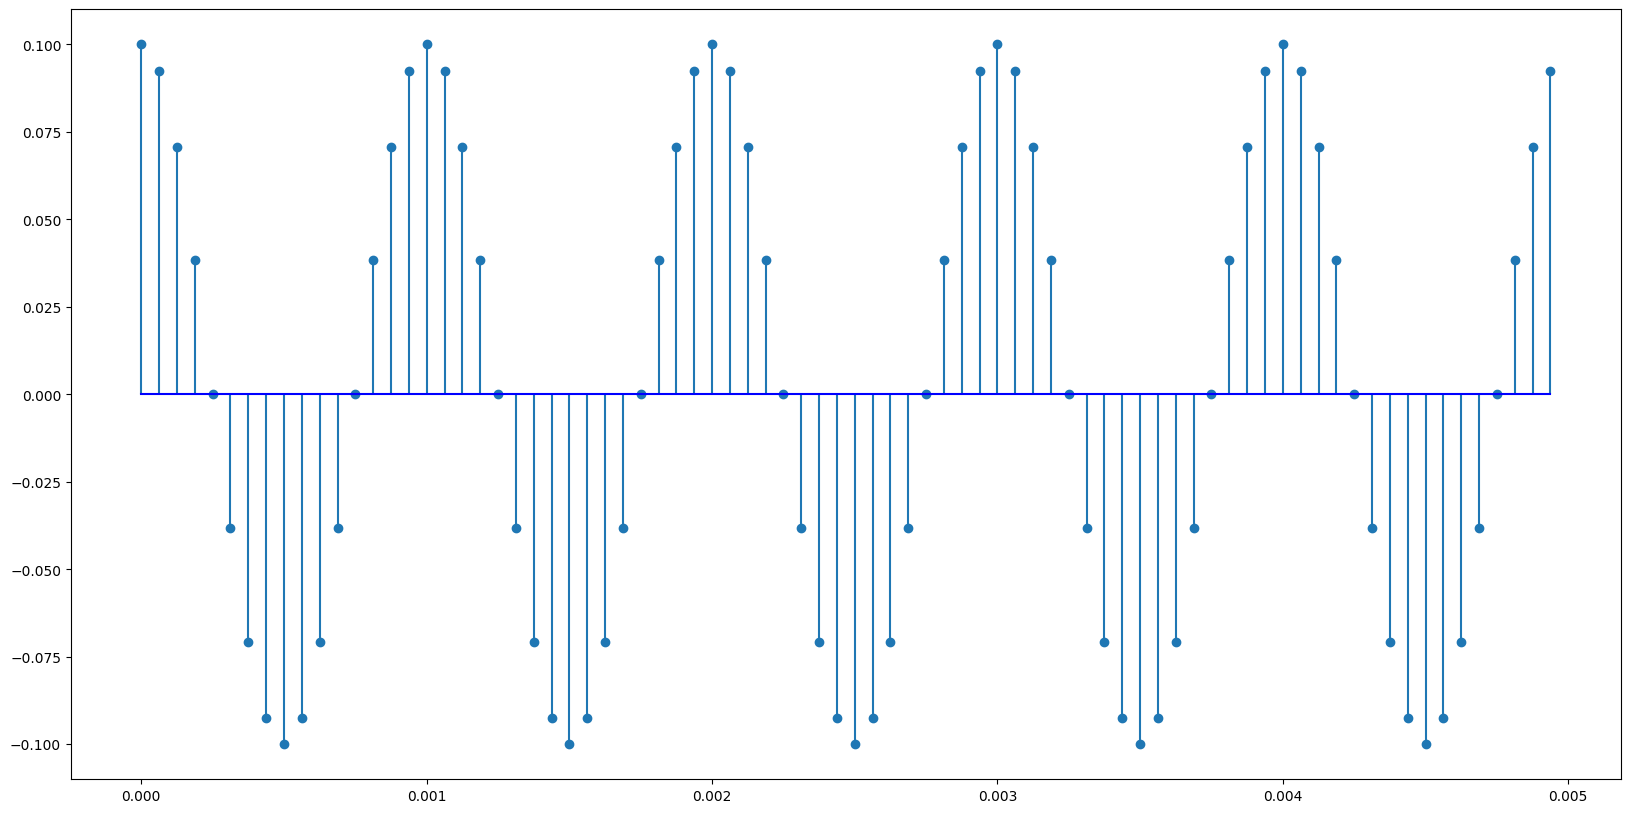

In [3]:
A=0.1;F=1000; Phi = 0;Fs=16000; sTime=0; eTime = 0.005
(x,y) = fnGenSampledSinusoid(A, F, Phi, Fs, sTime, eTime)
plt.figure(figsize=(20,10))
plt.stem(x,y,use_line_collection=True,basefmt="b")

In [4]:
def q3a_generateSampledSignal(F=1000):
    A=0.1; Phi = 0;Fs=16000; sTime=0; eTime = 1
    [n,yfloat] = fnGenSampledSinusoid(A, F, Phi, Fs, sTime, eTime)

    y_16bit = fnNormalizeFloatTo16Bit(yfloat)
    fileName ='./sound/01_q3a_'+str(F)+'.wav'
    wavfile.write(fileName, Fs, y_16bit)
    winsound.PlaySound(fileName, winsound.SND_FILENAME)

In [5]:
for x in range(0,32000,2000):
    q3a_generateSampledSignal(x)

Q3a) 
The sampling frequency is 16KHz. Hence, the Nyquist frequency is 8KHz. The highest frequency that can be represented is 8KHz. The lowest frequency that can be represented is 0Hz. 

As the Frequency increases from 0KHz to 8Khz. The sound becomes higher pitched as the frequency of the sound wave is directly proportional to the pitch of the sound. However, when the frequency increases beyond 8Khz, aliasing effect occurs. 

Aliasing occurs when a signal is sampled at a rate that is not high enough to accurately capture the frequency of the signal. As a result, the signal appears to have a lower frequency. 
 F (Fs > 2f)

Pitch increases from 0 to 8Khz. pitch decreases from 8Khz to 16Khz. Pitch increases from 16Khz to 24Khz and then the pitch decreases from 24Khz to 32Khz.


### 3.1b)

In [44]:
def q3b_generateSampledSignalFs16000():
    #y = 0.1*np.cos(2*np.pi*F*t)
    
    A=0.1;F=1000; Phi = 0;Fs=16000; sTime=-3*1/F; eTime = 3*1/F
    (x,y) = fnGenSampledSinusoid(A, F, Phi, Fs, sTime, eTime)
    plt.figure(figsize=(20,5))
    plt.subplot(311)
    plt.plot(x,y)
    plt.subplot(312)
    plt.stem(x,y,use_line_collection=True,basefmt="b")
    

    numPts = int(16000/1000*6)
    print(numPts)
    n = np.arange(0,numPts)
    Ts = 1/Fs   # sampling period = 1/sampling frequency
    nT = n*Ts   #(1.0/10)
    yNT = 0.1*np.cos(2*np.pi*F*nT)
    plt.figure(figsize=(20,5))
    plt.figure(2)
    plt.subplot(312)
    plt.stem(n,yNT,use_line_collection=True,basefmt="b")



96


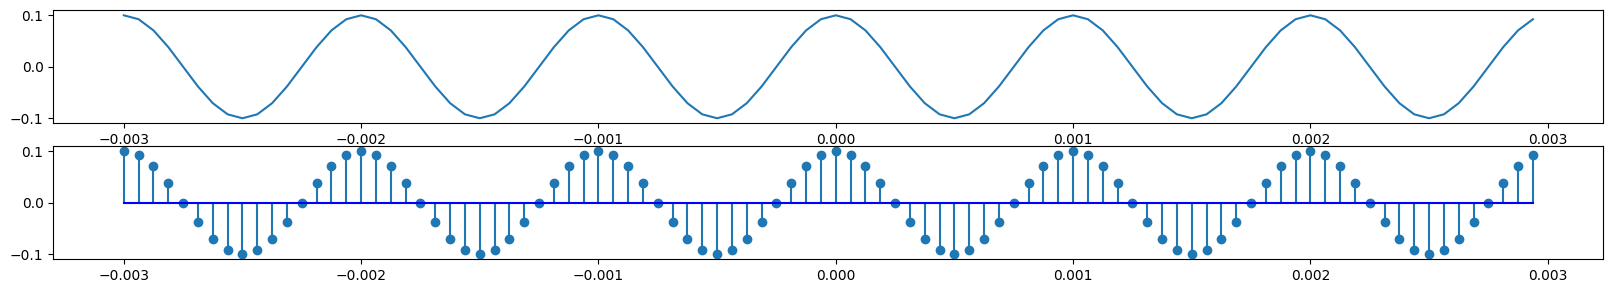

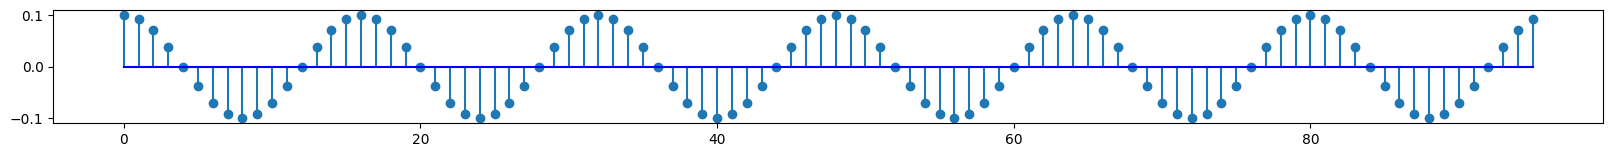

In [45]:
q3b_generateSampledSignalFs16000()

#### i. Comment on the relationships between y(t), y[nT]
Y(t) is a continuous-time signal. Y[nT] is a discrete-time representation of the continuous time signal. Y[nT] is a sampled version of y(t) at discrete time interval where nT is time index and T is the sampling period based on the sampling frequency of 16000 Hz. Therefore y[nT] is a discrete approximation of y(T) at specific points in time.


#### ii. Comment on y[nT] vs y[n]. how is index n related to actual time.
y[n] is a discrete-time signal that is generated by sampling y[nT]. The index n in y[n] is related to the actual time by the equation n = nT * fs, where fs is the sample rate


#### iii. Proof that the above y[n] (is periodic or not periodic). If periodic,how many samples are generated for y[n] for 6 cycles?
The signal repeats itself after each cycle. We can analyze the periodicity of y[n] by analyzing the relationship between y[n] and y[n+N], where N is the number of samples. if [n+N] is equal to y[n] for any positive integer N, then y[n] is periodic.

The number samples for each cycle is 96. We can calculate this by dividing Fs=16000 and F=1000 to get 16 samples for each cycle


#### iv. Now generate the same figure with F = 17000Hz and comment on what has occurred and the explanation aliasing has on this phenomenon.



In [8]:
def q3b_generateSampledSignalFs17000():  
    A=0.1;F=17000; Phi = 0;Fs=16000; sTime=0; eTime = 6*1/F
    (x,y) = fnGenSampledSinusoid(A, F, Phi, Fs, sTime, eTime)
    plt.figure(figsize=(20,5))
    plt.subplot(321)

    plt.plot(x,y,'g')
    plt.stem(x,y,'r-',use_line_collection=True,basefmt="r")


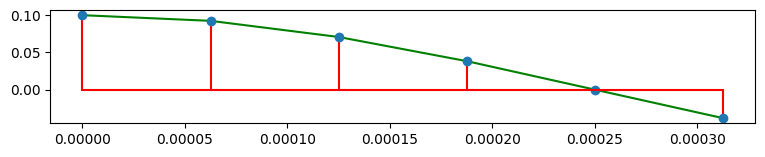

In [9]:
q3b_generateSampledSignalFs17000()

Aliasing Effect occurs. The sampling frequency is less than twice the frequency of the signal which is 17000Hz. Hence, the reconstruction algorithm will pick a different curve with lower frequency

### 3.1c

c) If the parameters for this question are now F=1, and 𝐹s = 16, comment on the new y[n] vs the original parameters of F=1000, Fs=16000. Are the values in the part b same for the new parameters?

Yes, the values are the same as the F/Fs ratio is the same

### 3.2 
Write a python program to generate a DTMF sequence, save it in a wave file (such that we can examine it), play it as an audio (within python). E.g. into a module such as

[t,y] = myDSPfn.GenSampledDTMF(‘0123#’, Fs, durTone)

where t stores the sample index, and y stores the sample values.

In [10]:
class DTMFGen:
    low_freq = [697, 770, 852, 941]
    high_freq = [1209, 1336, 1477, 1633]
    
    user_tones = {
            '1': (low_freq[0], high_freq[0]),
            '2': (low_freq[0], high_freq[0]),
            '3': (low_freq[0], high_freq[0]),
            '4': (low_freq[1], high_freq[1]),
            '5': (low_freq[1], high_freq[1]),
            '6': (low_freq[1], high_freq[1]),
            '7': (low_freq[2], high_freq[2]),
            '8': (low_freq[2], high_freq[2]),
            '9': (low_freq[2], high_freq[2]),
            '0': (low_freq[3], high_freq[3]),
            '*': (low_freq[3], high_freq[3]),
            '#': (low_freq[3], high_freq[3]),
        }
    
    def GenSampledDTMF(key,Fs,dur,A=0.5,sTime=0,Phi=0):
        if key in DTMFGen.user_tones:
            (f_low,f_high) = DTMFGen.user_tones.get(key)
            #print((f_low,f_high))
            t = np.arange(0,dur,1/Fs)
            yfloat = A*(np.cos(2*np.pi*f_low*t+Phi)+np.cos(2*np.pi*f_high*t+Phi))
            return (t,yfloat)
        else:
            print("Invalid")
            
    def GenSequenceDTMF(keyseq,Fs,durseq,A=0.5,sTime=0,Phi=0):
        assert (len(keyseq) == len(durseq))
        t = np.arange(sTime,sum(durseq),1.0/Fs)
        y = np.array([])
        for i in range(len(durseq)):
            #print(i,durseq[i])
            _,y_segment = DTMFGen.GenSampledDTMF(keyseq[i],Fs,durseq[i])
            y = np.concatenate((y,y_segment),axis=None)
        #print(len(y))
        
        return t,y

        
    
                   

In [14]:
for x in [1,2,3,4,5,6,7,8,9]:
    Fs=16000
    (t_2,y_2) = DTMFGen.GenSampledDTMF(str(x),Fs,1.0)
    y_16bit = fnNormalizeFloatTo16Bit(y_2)
    fileName ='./sound/01_q32.wav'
    wavfile.write(fileName, Fs, y_16bit)
    winsound.PlaySound(fileName, winsound.SND_FILENAME)

In [15]:
(t_2,y_2) = DTMFGen.GenSequenceDTMF('1',16000,[1])
y_16bit = fnNormalizeFloatTo16Bit(y_2)
fileName ='./sound/01_q32.wav'
wavfile.write(fileName, Fs, y_16bit)
winsound.PlaySound(fileName, winsound.SND_FILENAME)

In [16]:
(t_2,y_2) = DTMFGen.GenSequenceDTMF('90898550',16000,[0.1*(i+1) for i in range(8)])
y_16bit = fnNormalizeFloatTo16Bit(y_2)
fileName ='./sound/01_q32.wav'
wavfile.write(fileName, Fs, y_16bit)
winsound.PlaySound(fileName, winsound.SND_FILENAME)

### Q3.3
Given y1(t) = Acos(2*pi*10*t), y2(t) = Bcos(2*pi*15*t), and y3(t) = y1(t)+y2(t) sampled at Fs = 60.

a. Find the discrete time representation of y1[n], y2[n], and y3[n].

<StemContainer object of 3 artists>

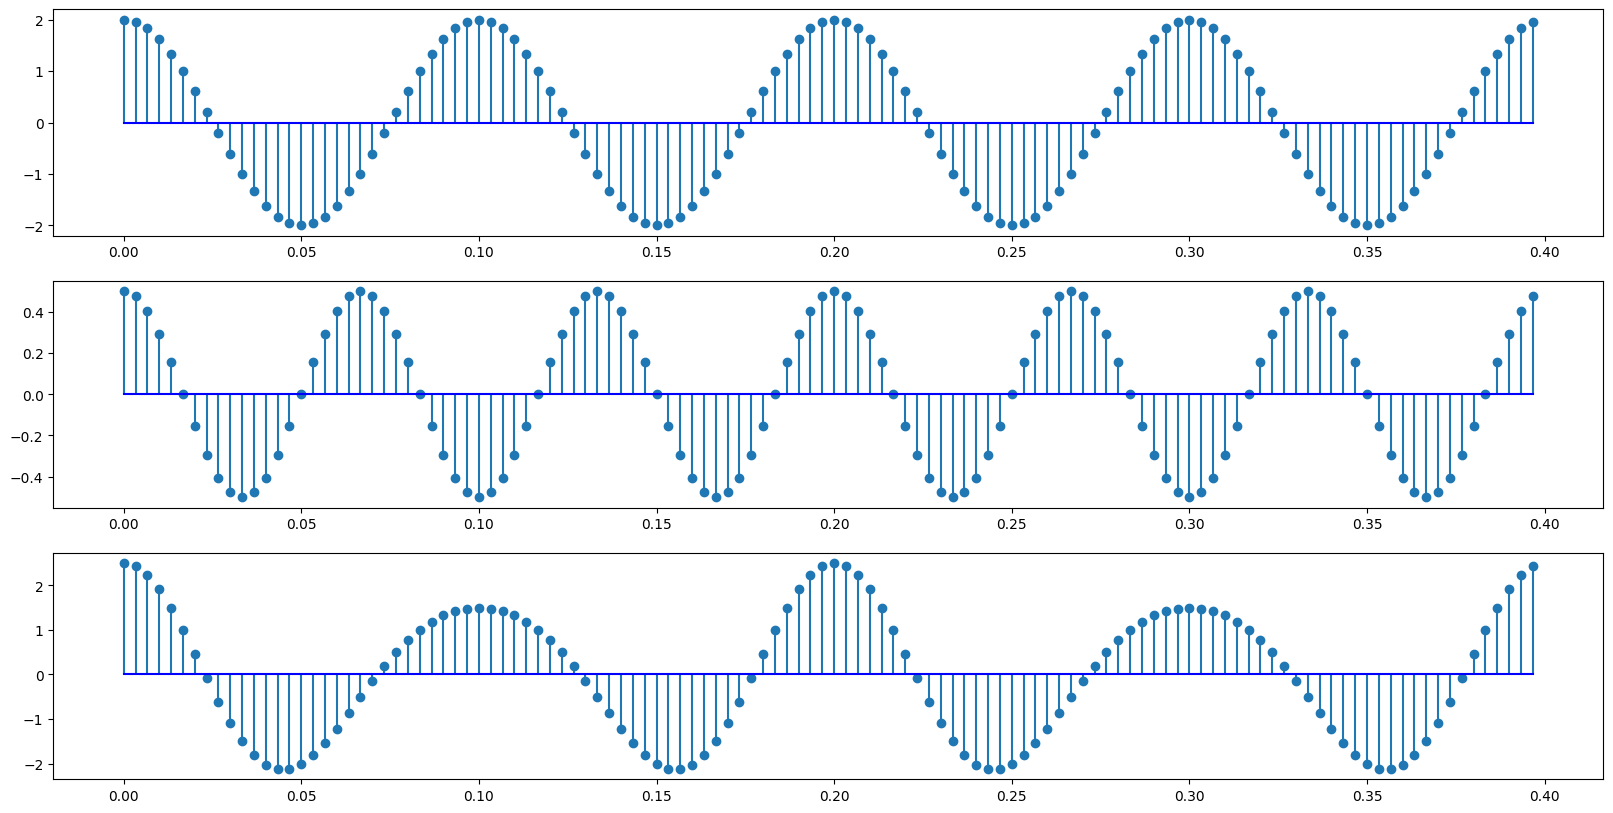

In [78]:
A=2;
B=0.5;
Phi = 0;
Fs=300; 
sTime=0; 
numCycles = 6;
plots_per_cycle=20
num_pts_to_plot = numCycles * plots_per_cycle
eTime = num_pts_to_plot*1/Fs

(x1,y1) = fnGenSampledSinusoid(A, 10, Phi, Fs, sTime, eTime)
(x2,y2) = fnGenSampledSinusoid(B, 15, Phi, Fs, sTime, eTime)
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.stem(x1,y1,use_line_collection=True,basefmt="b")
plt.subplot(312)
plt.stem(x2,y2,use_line_collection=True,basefmt="b")
plt.subplot(313)
plt.stem(x2,y1+y2,use_line_collection=True,basefmt="b")

b. Find the period of y1[n], y2[n],and y3[n].

In [87]:
F1=10
F2=15
y1_period = 1/F1
y2_period = 1/F2
print (1/math.gcd(10, 15))
print(y1_period,y2_period)

0.2
0.1 0.06666666666666667


c. How are the periods of y3[n] related to y1[1] and y2[n]?

In [88]:
# The period of Y3[n] is the least common multiple of the period y1[n] and y2[n] 

d. Is y3[n] an energy or power signal? Find its (energy or power) and compare it against (energy or power) of y1[n] and y2[n].

In [89]:
# y3[n] is a power signal as it is the sum of two power signal.


### Q3.4

Write a python program to generate and plot the following discrete time signal
𝑦[n] = A^n e^j(wn+omega)

where A is a real number, digital frequency 𝜔 (in radian/sample), phase shift 𝜙 (radian), for a given range n = 0...N, and n, N ∈ 𝑍. Visualize the complex discrete sequence y[n] in 3 ways, e.g., A=0.95, 𝜔 = 2pi/36,

(1) 2-D plot of real and imaginary values in the same figure using different
colours.

(2) Polar plots of the sequence.

(3) 3-D plot showing trajectory with respect to sample index.

(4) Redo Q3.4 with 􀵌 2𝜋/18, comment on the difference in the 3 plots.

### Q3.5

Let W^k = 1e^j(2pi/N *kn) and k ∈ Z

a. Generate the 2-D polar and 3-D plots of 𝑊􀯞 for N = 16, n = 0..N-1,
plot W^0,W^1,W^2,W^3

b. Comment on their relationship with respect to k and number of cycles and angular frequency.